In [159]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing # normalization
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib

## iris

In [160]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [161]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, 
                                                    test_size=0.2)

In [162]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [163]:
(y_test - knn.predict(X_test)).sum()

0

## datasets

In [164]:
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

In [165]:
model = LinearRegression(normalize=True)
model.fit(data_X, data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [166]:
model.predict(data_X[:4,:])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649])

In [167]:
data_y[:4]

array([24. , 21.6, 34.7, 33.4])

### make fake data

In [168]:
X, y = datasets.make_regression(n_samples=100, n_features=1, 
                                n_targets=1, noise=10)

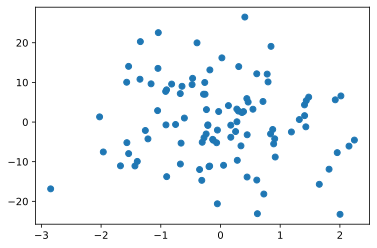

In [169]:
plt.scatter(X, y)

## model 属性功能

In [170]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [171]:
model.intercept_

36.45948838508991

In [172]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [173]:
model.score(data_X, data_y) # R^2 coefficient of determination

0.7406426641094094

## normalization 标准化
Feature Scalling

In [174]:
a = np.array([[10,2.7,3.6],
              [-100,5,-2],
              [120,20,40]], dtype=np.float64)
a

array([[  10. ,    2.7,    3.6],
       [-100. ,    5. ,   -2. ],
       [ 120. ,   20. ,   40. ]])

In [175]:
preprocessing.scale(a)

array([[ 0.        , -0.85170713, -0.55138018],
       [-1.22474487, -0.55187146, -0.852133  ],
       [ 1.22474487,  1.40357859,  1.40351318]])

In [176]:
X, y = make_classification(n_samples=300,n_features=2,n_redundant=0,
                           n_informative=2, random_state=22,
                           n_clusters_per_class=1,scale=100)

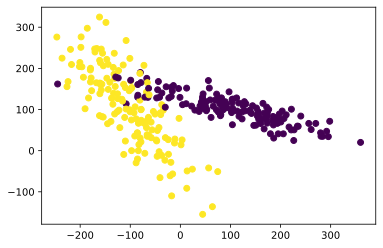

In [177]:
plt.scatter(X[:,0],X[:,1],c=y)

In [190]:
X = preprocessing.scale(X)

In [191]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9833333333333333

## 交叉验证

In [230]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [231]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y,
                                                    random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

In [232]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, iris_X, iris_y, cv=5, scoring='accuracy')
scores.mean()

0.9733333333333334

In [243]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # loss = -cross_val_score(knn, iris_X, iris_y, cv=10, scoring='neg_mean_squared_error') # for regression
    scores = cross_val_score(knn, iris_X, iris_y, cv=10, scoring='accuracy') # for classification
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated Accuracy')

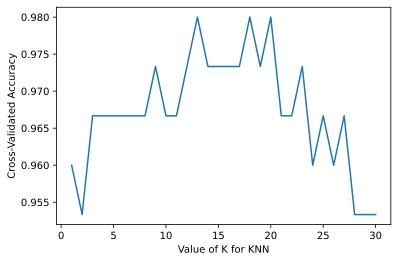

In [244]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### over fitting
过拟合

In [255]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits

In [247]:
digits = load_digits()
X = digits.data
y = digits.target

In [253]:
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1]
)
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

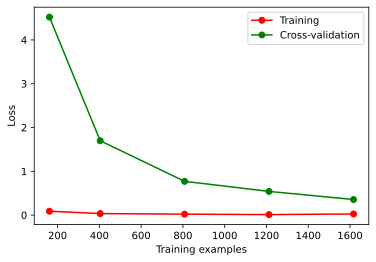

In [254]:
plt.plot(train_sizes, train_loss_mean,'o-',color='r',
         label='Training')
plt.plot(train_sizes, test_loss_mean,'o-',color='g',
         label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")

In [260]:
param_range = np.logspace(-6, -2.3, 5)

In [261]:
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma',param_range=param_range, 
    cv=10, scoring='neg_mean_squared_error'
)
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

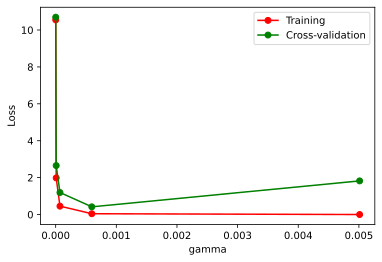

In [263]:
plt.plot(param_range, train_loss_mean,'o-',color='r',
         label='Training')
plt.plot(param_range, test_loss_mean,'o-',color='g',
         label="Cross-validation")
plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")

## save

In [265]:
from sklearn import svm

In [266]:
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [268]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [269]:
# method 1: pickle
import pickle
with open('gdrive/My Drive/ML/clf.pickle','wb') as f:
    pickle.dump(clf, f)

In [271]:
with open('gdrive/My Drive/ML/clf.pickle','rb') as f:
    clf2 = pickle.load(f)
clf2.predict(X[0:1])

array([0])

In [275]:
# method 2: joblib
from sklearn.externals import joblib
# save
joblib.dump(clf, 'gdrive/My Drive/ML/clf.pkl')
# restore
clf3 = joblib.load('gdrive/My Drive/ML/clf.pkl')
clf3.predict(X[0:1])

array([0])